In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Read the CSV file
data_path = 'E:/Hypertension-Tool/backend/Hypertension-risk-model-main.csv'
df = pd.read_csv(data_path)

# Show a summary of the data
print("First 5 records:")
print(df.head())
print("\nData description:")
print(df.describe())
print("\nData info:")
print(df.info())


First 5 records:
   Systolic_BP  Diastolic_BP  Heart_Rate  Risk
0        106.0          70.0        80.0     0
1        121.0          81.0        95.0     0
2        127.5          80.0        75.0     0
3        150.0          95.0        65.0     1
4        130.0          84.0        85.0     0

Data description:
       Systolic_BP  Diastolic_BP   Heart_Rate         Risk
count  4240.000000   4240.000000  4239.000000  4240.000000
mean    132.354599     82.897759    75.878981     0.310613
std      22.033300     11.910394    12.025348     0.462799
min      83.500000     48.000000    44.000000     0.000000
25%     117.000000     75.000000    68.000000     0.000000
50%     128.000000     82.000000    75.000000     0.000000
75%     144.000000     90.000000    83.000000     1.000000
max     295.000000    142.500000   143.000000     1.000000

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 4 columns):
 #   Column        Non-Null Count

In [2]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values by column:")
print(missing)



Missing values by column:
Systolic_BP     0
Diastolic_BP    0
Heart_Rate      1
Risk            0
dtype: int64


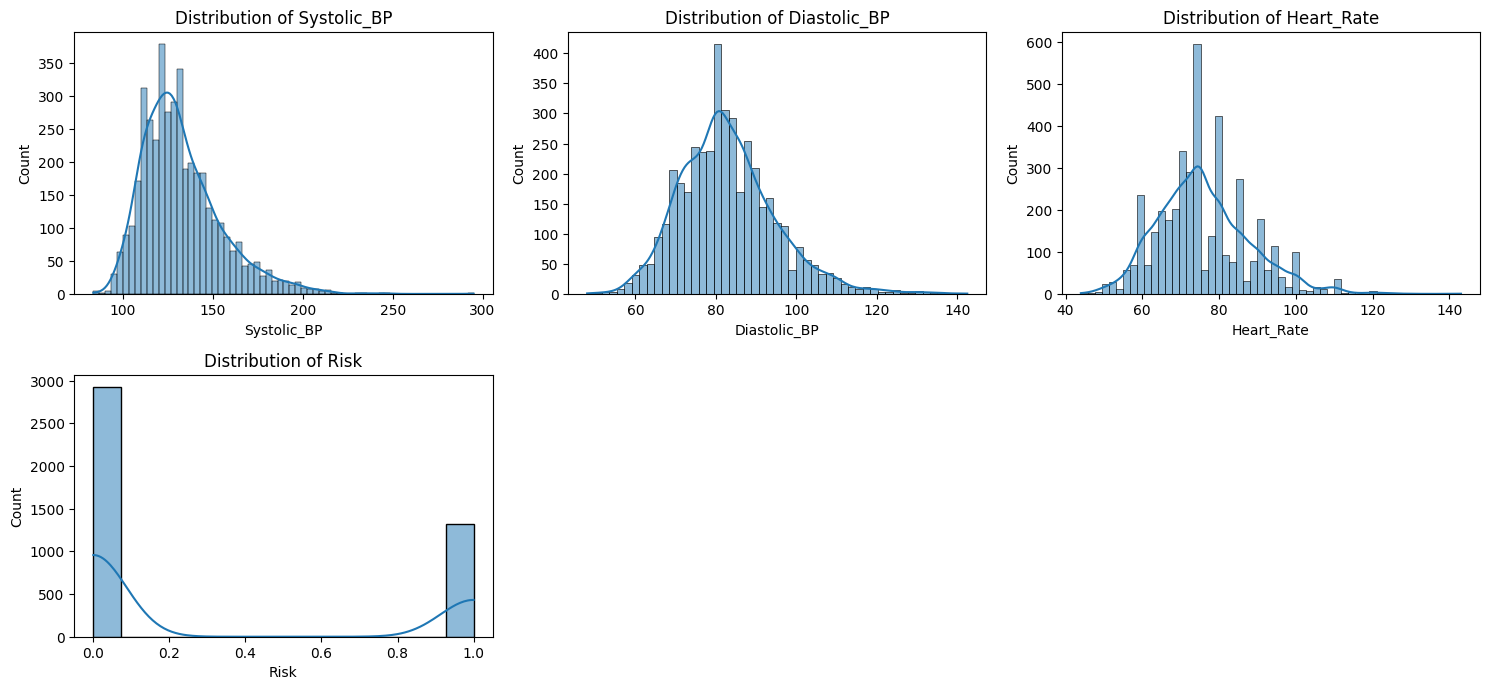

In [3]:
# Histogram for numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


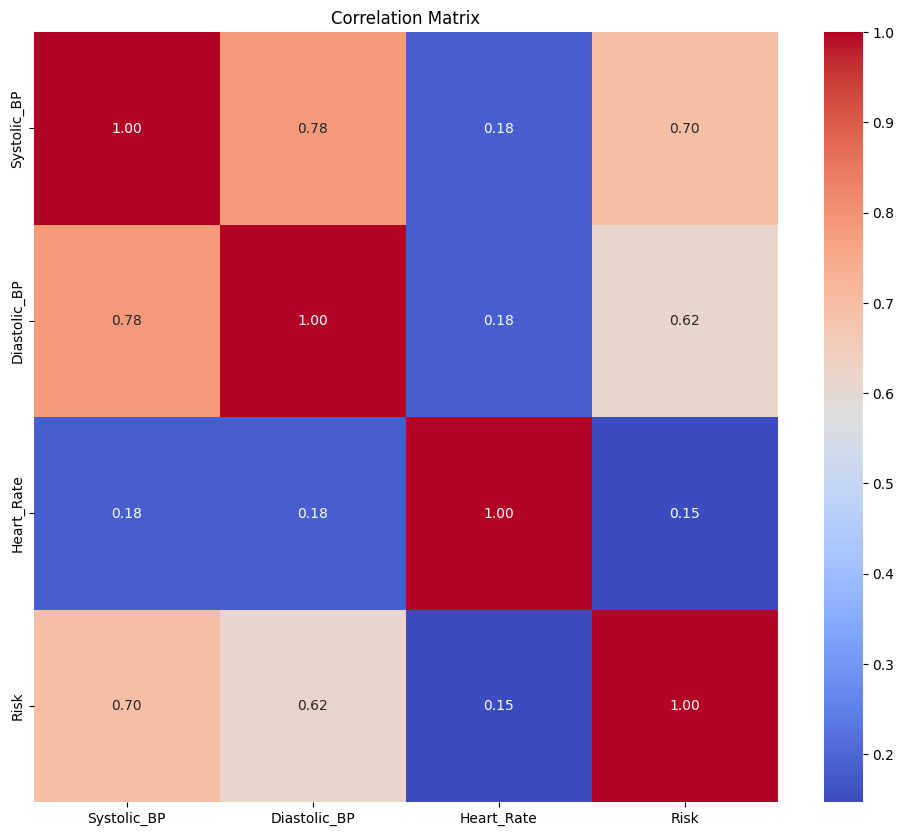

In [4]:
# Compute correlation matrix and plot heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Example: Fill missing numeric values with median
for col in num_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)



C:\Users\USER\AppData\Local\Temp\ipykernel_2968\1661754550.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
# Separate features and target
target_col = 'Risk'  # change this if your target variable has a different name
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in data!")

X = df.drop(target_col, axis=1)
y = df[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (3392, 3), Testing set: (848, 3)


In [7]:
# Instantiate a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Parameters for GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Setup Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best parameters found: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}

Accuracy on test set: 0.8985849056603774

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       595
           1       0.80      0.89      0.84       253

    accuracy                           0.90       848
   macro avg       0.87      0.89      0.88       848
weighted avg       0.90      0.90      0.90       848



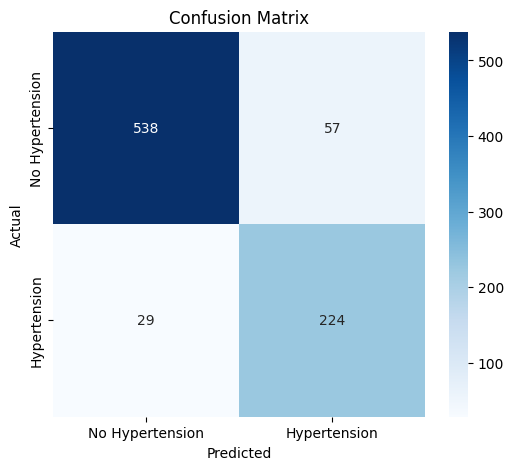

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hypertension', 'Hypertension'], yticklabels=['No Hypertension', 'Hypertension'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


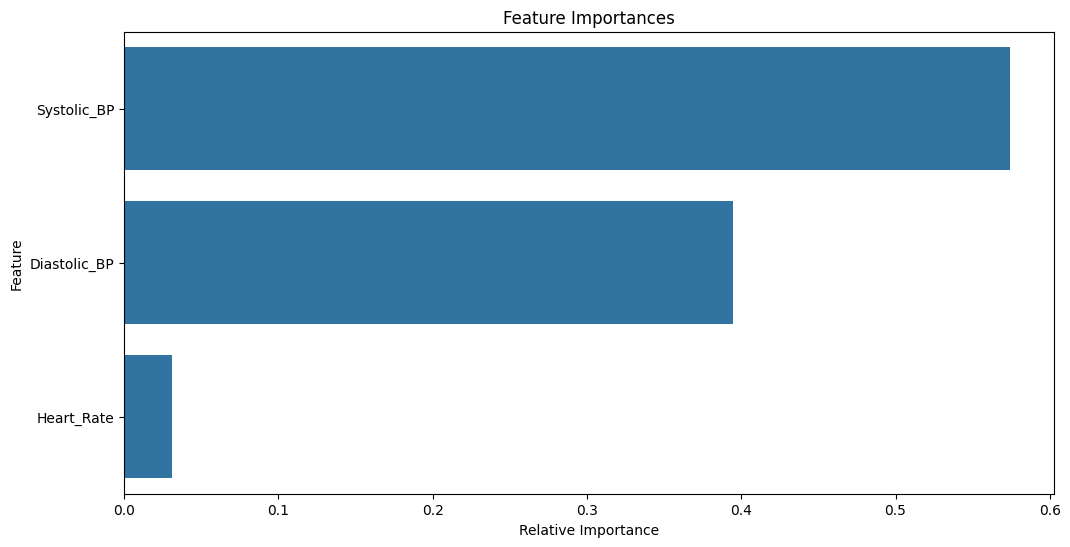

In [9]:
# Plot feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()


In [10]:
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder

# Save the model to a file
model_path = 'random_forest_model.joblib'
dump(best_rf, model_path)
print(f"Model saved to {model_path}")

# Load the model from the file
loaded_model = load(model_path)
print("Model loaded successfully")
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save the label encoder to a file
encoder_path = 'label_encoder_model_1.joblib'
dump(label_encoder, encoder_path)
print(f"Label encoder saved to {encoder_path}")

# Load the label encoder from the file
loaded_encoder = load(encoder_path)
print("Label encoder loaded successfully")

Model saved to random_forest_model.joblib
Model loaded successfully
Label encoder saved to label_encoder_model_1.joblib
Label encoder loaded successfully
